In [175]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [176]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [177]:
from IPython.display import HTML

style = "<style>svg{width: 70 !important; height: 70% !important}</style>"
HTML(style)

In [178]:
iris_train_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv", index_col=0)
iris_train_data = iris_train_data.rename(columns={'sepal length': 'sepal_length',
                                                  'sepal width': 'sepal_width',
                                                  'petal length': 'petal_length',
                                                  'petal width': 'petal_width'})
iris_train_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [179]:
iris_test_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/test_iris.csv", index_col=0)
iris_test_data = iris_test_data.rename(columns={'sepal length': 'sepal_length',
                                                 'sepal width': 'sepal_width',
                                                 'petal length': 'petal_length',
                                                 'petal width': 'petal_width'})
iris_test_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [180]:
X_train = iris_train_data.drop(['species'], axis=1)
y_train = iris_train_data.species
X_test = iris_test_data.drop(['species'], axis=1)
y_test = iris_test_data.species

In [181]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5


In [182]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
70,5.9,3.2,4.8,1.8
138,6.0,3.0,4.8,1.8
59,5.2,2.7,3.9,1.4
44,5.1,3.8,1.9,0.4


In [183]:
max_depth_values = range(1, 100)

In [184]:
score_data = pd.DataFrame()
rs = np.random.seed(0)

In [185]:
for depth_level in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth_level, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'depth_level': [depth_level],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})

    score_data = score_data.append(temp_score_data)

C:\Users\mrbab\AppData\Local\Temp\ipykernel_7176\2249123577.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append(temp_score_data)
C:\Users\mrbab\AppData\Local\Temp\ipykernel_7176\2249123577.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append(temp_score_data)
C:\Users\mrbab\AppData\Local\Temp\ipykernel_7176\2249123577.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append(temp_score_data)
C:\Users\mrbab\AppData\Local\Temp\ipykernel_7176\2249123577.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append(temp_score_data)


In [186]:
score_data_long = pd.melt(score_data, id_vars=['depth_level'],
                          value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

In [187]:
score_data_long

,depth_level,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
193,95,test_score,0.92
194,96,test_score,0.92
195,97,test_score,0.92
196,98,test_score,0.94


<Axes: xlabel='depth_level', ylabel='score'>

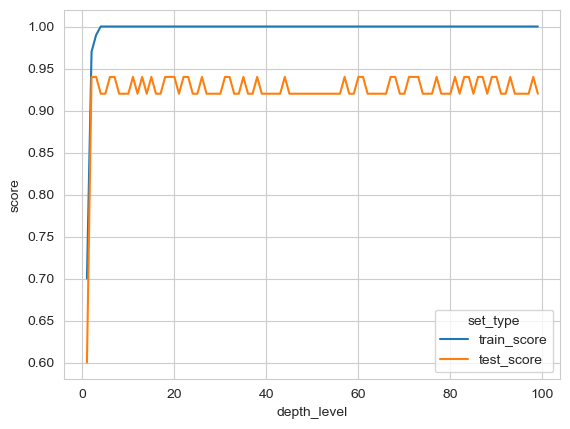

In [188]:
sns.lineplot(x='depth_level', y='score', hue='set_type', data=score_data_long)

In [189]:
score_data_long.query("set_type == 'test_score'").head()

,depth_level,set_type,score
99,1,test_score,0.60
100,2,test_score,0.94
101,3,test_score,0.94
102,4,test_score,0.92
103,5,test_score,0.92


In [190]:
# train_iris = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv", index_col=0)
# test_iris = pd.read_csv("https://stepik.org/media/attachments/course/4852/test_iris.csv", index_col=0)
# # test_iris = iris_test_data
# # train_iris = iris_train_data
# X_train = train_iris.drop(["species"], axis=1)
# y_train = train_iris.species
# X_test = test_iris.drop(["species"], axis=1)
# y_test = test_iris.species
# scores_data = pd.DataFrame()
#
#
#
# rs = np.random.seed(0)
# max_depth_values = range(1,100)
# for max_depth in max_depth_values:
#     ttt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
#     ttt.fit(X_train, y_train)
#     train_score = ttt.score(X_train, y_train)
#     test_score = ttt.score(X_test, y_test)
#     tmp_score_data = pd.DataFrame({'d': [max_depth], 'test': [test_score], 'train': [train_score]})
#     scores_data = scores_data.append(tmp_score_data, sort=True)
#
#
#
# data_melt = pd.melt(scores_data, id_vars=['d'], value_vars=['train', 'test'], var_name=['type'], value_name='score')
#
#
# plt.figure(figsize=(16, 6))


In [191]:
# sns.lineplot(x="d", y="score", hue="type", data=data_melt)